# DELHIVERY FEATURE ENGINEERING PROJECT

## About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### 1)Basic Cleaning and Exploration

In [276]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import levene,kruskal,shapiro,ttest_ind,probplot,boxcox,mannwhitneyu
from sklearn.preprocessing import MinMaxScaler

#ignoore warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.style.use('ggplot')

#getting max rows anc columns without truncating
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# reading the csv files
data=pd.read_csv('/content/delhivery_data.csv')

In [197]:
#create a copy  to increase efficiency
delhivery_df=data.copy()

In [198]:
# shape of the dataframe
delhivery_df.shape

(144867, 24)

In [199]:
#finding nulls in the df
delhivery_df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [200]:
#first 5 row data of delhivery_df
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [201]:
#converting the dates that is in object into datetime

time_variables = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']

for col in time_variables:
    delhivery_df[col] = pd.to_datetime(delhivery_df[col], errors='coerce')


In [202]:
#df info()
delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [203]:
df=delhivery_df.copy()

In [204]:
df.dropna(inplace=True)
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,140909,140909,140909,140909.000000,140909.000000,140909,140909.000000,140909.000000,140909.000000,140909.000000,140909.000000,140909.000000,140909.000000,140909.000000,140909.000000
mean,2018-09-22 14:05:30.872542464,2018-09-22 18:31:54.393598208,2018-09-23 10:55:02.355084032,982.636602,237.887906,2018-09-23 03:15:10.623693056,239.042070,424.627369,218.228140,290.762437,2.103093,35.820735,18.631230,23.017969,2.159147
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,21.000000,9.000000,2018-09-12 00:10:27,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,2018-09-17 03:43:26.904686080,2018-09-17 08:19:10.774424064,2018-09-18 01:53:33.136686080,168.000000,22.000000,2018-09-17 19:18:34,23.381264,51.000000,27.000000,30.052700,1.602041,20.000000,11.000000,12.272200,1.346154
50%,2018-09-22 04:55:04.835022080,2018-09-22 09:37:41.902204928,2018-09-23 04:15:08.246489088,472.000000,66.000000,2018-09-22 21:15:24,66.450476,135.000000,66.000000,80.557600,1.852941,28.000000,17.000000,23.602800,1.666667
75%,2018-09-27 19:08:42.276193024,2018-09-27 23:37:59.533010944,2018-09-28 15:33:44.700043008,1686.000000,308.000000,2018-09-28 06:12:35,308.035783,533.000000,269.000000,358.707400,2.200000,40.000000,22.000000,27.898500,2.222222
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,2018-10-06 23:44:12,1927.447705,4154.000000,1686.000000,2326.199100,76.500000,3051.000000,1611.000000,2191.403700,558.500000
std,NaN,NaN,NaN,1042.382580,347.816993,NaN,348.051439,603.310229,310.774552,424.893118,1.661662,50.473058,14.726216,17.839862,4.328712


In [205]:
delhivery_df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,141438,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,232.926567,2018-09-23 03:43:41.794807552,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,2018-09-12 00:10:27,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,22.000000,2018-09-17 19:52:04.750000128,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.000000,2018-09-22 22:02:55,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.000000,2018-09-28 06:37:55,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,2018-10-06 23:44:12,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,344.755577,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530


In [206]:
# dropping the null values from the dataframe
delhivery_df.dropna(inplace=True)

In [207]:
delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140909 entries, 0 to 144865
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            140909 non-null  object        
 1   trip_creation_time              140909 non-null  datetime64[ns]
 2   route_schedule_uuid             140909 non-null  object        
 3   route_type                      140909 non-null  object        
 4   trip_uuid                       140909 non-null  object        
 5   source_center                   140909 non-null  object        
 6   source_name                     140909 non-null  object        
 7   destination_center              140909 non-null  object        
 8   destination_name                140909 non-null  object        
 9   od_start_time                   140909 non-null  datetime64[ns]
 10  od_end_time                     140909 non-null  datetime64[n

In [208]:
# Assuming 'df' is your DataFrame
delhivery_df['segment_key'] = delhivery_df['trip_uuid'] + '_' + delhivery_df['source_center'] + '_' + delhivery_df['destination_center']


In [209]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320_IND388620AAB_IND388320AAA


In [210]:
# Assuming 'df' is your DataFrame
columns_to_sum = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in columns_to_sum:
    delhivery_df[col + '_sum'] = delhivery_df.groupby('segment_key')[col].cumsum()


In [ ]:
delhivery_df[[col + '_sum' for col in columns_to_sum]]

In [212]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,45.0,34.7467,32.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,51.0,38.6620,37.0
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320_IND388620AAB_IND388320AAA,15.0,12.1171,11.0


In [213]:
delhivery_df.columns


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

## 2) Merging of rows and aggregation of fields

In [214]:
create_segment_dict={
    'data':'first',
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid':'first',
    'source_center':'first',
    'source_name':'first',
    'destination_center':'last',
    'destination_name':'last',
    'od_start_time':'first',
    'od_end_time':'first',
    'start_scan_to_end_scan':'last',
    'actual_distance_to_destination':'last',
    'actual_time':'last',
    'osrm_time':'last',
    'osrm_distance':'last',
    'segment_actual_time':'sum',
    'segment_osrm_distance':'sum',
    'segment_osrm_time':'sum'

}


In [215]:
segment=delhivery_df.groupby('segment_key').agg(create_segment_dict).sort_values(by=['segment_key','od_start_time'],ascending=True).reset_index()

In [216]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25713 entries, 0 to 25712
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     25713 non-null  object        
 1   data                            25713 non-null  object        
 2   trip_creation_time              25713 non-null  datetime64[ns]
 3   route_schedule_uuid             25713 non-null  object        
 4   route_type                      25713 non-null  object        
 5   trip_uuid                       25713 non-null  object        
 6   source_center                   25713 non-null  object        
 7   source_name                     25713 non-null  object        
 8   destination_center              25713 non-null  object        
 9   destination_name                25713 non-null  object        
 10  od_start_time                   25713 non-null  datetime64[ns]
 11  od

In [217]:
segment['od_time_diff_hour']=segment['od_end_time']-segment['od_start_time']

In [218]:
segment['destination_state']=segment['destination_name'].str.split('(').str[1].str.replace(')', '')

In [219]:
segment['source_state']=segment['source_name'].str.split('(').str[1].str.replace(')', '')

In [220]:
def destination_source_details(city_dict,place_mapping,k,segment):
    destination = segment[f'{k}_name'].str.lower().str.replace(r'\s*\(.*\)', '', regex=True).str.split('_').str[0]
    place = segment[f'{k}_name'].str.lower().str.replace(r'\s*\(.*\)', '', regex=True).str.split('_').str[1]
    segment[f"{k}_city"] = segment[f"{k}_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0].str.lower()
    segment[f"{k}_city"]=segment[f"{k}_city"].map(city_dict).fillna(segment[f"{k}_city"]).str.title()
    segment[f"{k}_place"]=segment[f"{k}_name"].str.split(" ", n=1, expand=True)[0].str.split("_", expand=True).iloc[:, 1].str.lower()
    segment[f"{k}_place"]=segment[f"{k}_name"].str.split(" ", n=1, expand=True)[0].str.split("_", expand=True).iloc[:, 1].str.lower()
    segment[f"{k}_code"]=segment[f"{k}_name"].str.split(" ", n=1, expand=True)[0].str.split("_", expand=True).iloc[:, 2].str.lower()
    segment[f"{k}_code"]=segment[f"{k}_name"].str.split(" ", n=1, expand=True)[0].str.split("_", expand=True).iloc[:, 2].str.lower()
    segment[f"{k}_place"] = segment[f"{k}_place"].fillna(destination).str.title()
    segment[f"{k}_place"]=segment[f"{k}_place"].str.lower().map(place_mapping).fillna(segment[f"{k}_place"]).str.title()
#     segment[f"{k}_code"] = segment[f"{k}_code"].fillna(segment[f"{k}_place"]).str.title()
    segment[f"{k}_code"] = segment[f"{k}_code"].fillna(segment[f"{k}_place"].str.upper().apply(lambda x: "PC" if x == "HBR LAYOUT" else "DPC" if x in ["VADGAON SHERI", "RAHATANI", "PASHAN"] else x if x in ["DPC", "DC", "B", "RPC"] else "UNKNOWN CODE")).str.title()

    segment[f"{k}_place"] = segment[f"{k}_place"].str.upper().apply(lambda x: 'Unknown' if x in ["DPC", "DC", "B", "RPC"] else x).str.title()

    a=['central','east','west','north','south','hub']
    for i in a:
        if (segment[f"{k}_place"].str.lower() == i).any():
    # Modify destination_place for rows where the condition is met
            segment.loc[segment[f"{k}_place"].str.lower() == i, f"{k}_place"] = segment[f"{k}_city"] + " " + segment[f"{k}_place"].str.title()
        else:
    # Handle cases where destination_place is not 'central'
            pass


In [221]:
# Create a dictionary for city replacements
city_dict = {
    'amd': 'ahmedabad',
    'ggn': 'gurugaon',
    'maa': 'chennai',
    'ok': 'faridabad',
    'fbd': 'faridabad',
    'ccu': 'kolkata',
    'bangalore': 'bengaluru',
    'blr': 'bengaluru',
    'gzb': 'ghaziabad',
    'hbr': 'bengaluru',
    'bhopal': 'bhopal',
    'pnq': 'pune',
    'pune': 'pune',
    'cjb': 'coimbatore',
    'hyd': 'hyderabad'
}



place_mapping = {
    'hbr layout pc': 'hbr layout',
    'bhopal mp nagar': 'mp nagar',
    'pnq vadgaon sheri dpc': 'vadgaon sheri',
    'pune balaji nagar': 'balaji nagar',
    'pnq rahatani dpc': 'rahatani',
    'pnq pashan dpc': 'pashan',
    'hbr':'hbr layout'
}




destination_source_details(city_dict,place_mapping,'destination',segment)
destination_source_details(city_dict,place_mapping,'source',segment)

# destination = segment['destination_name'].str.lower().str.replace(r'\s*\(.*\)', '', regex=True).str.split('_').str[0]


# source= segment['source_name'].str.lower().str.replace(r'\s*\(.*\)', '', regex=True).str.split('_').str[0]


## 3)Featuring Engineering

In [233]:
segment['trip_creation_month']=segment['trip_creation_time'].dt.month
segment['trip_creation_hour']=segment['trip_creation_time'].dt.hour
segment['trip_creation_day']=segment['trip_creation_time'].dt.day
segment['trip_creation_year']=segment['trip_creation_time'].dt.year
segment['trip_creation_month_name']=segment['trip_creation_time'].dt.month_name()


## 4)Indepth Aalysis

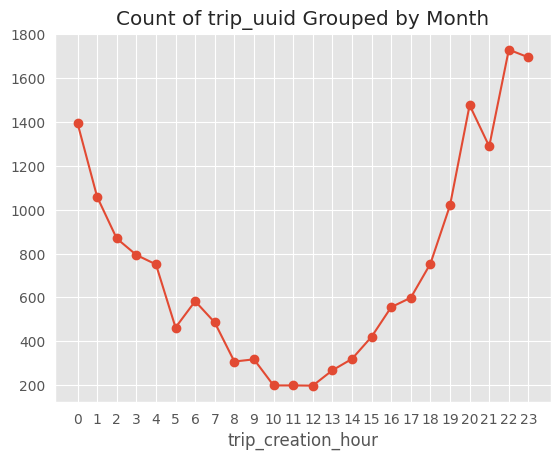

In [336]:
grouped=segment.groupby(by = 'trip_creation_hour')['trip_uuid'].count()


# If you want to explode the first slice, for example, you can do:


grouped.plot(kind='line',marker='o')
plt.xticks(np.arange(0,24))

plt.ylabel('')  # This removes the 'trip_uuid' label on the y-axis
plt.title('Count of trip_uuid Grouped by Month')
plt.show()

Most trip created at **22.00 hr**

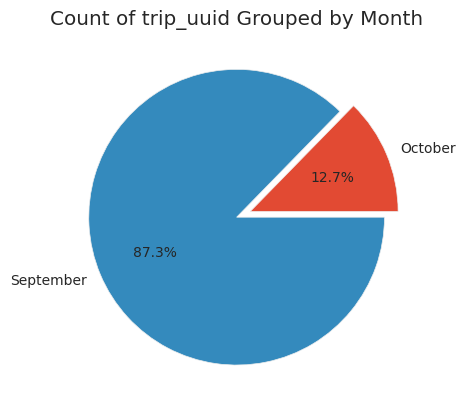

In [328]:
grouped=segment.groupby(by = 'trip_creation_month_name')['trip_uuid'].count()
explode = [0]*len(grouped)

# If you want to explode the first slice, for example, you can do:
explode[0] = 0.1

grouped.plot(kind='pie', autopct='%1.1f%%', explode=explode)

plt.ylabel('')  # This removes the 'trip_uuid' label on the y-axis
plt.title('Count of trip_uuid Grouped by Month')
plt.show()

**87.3%** of the total is from **September** and rest is from **October**

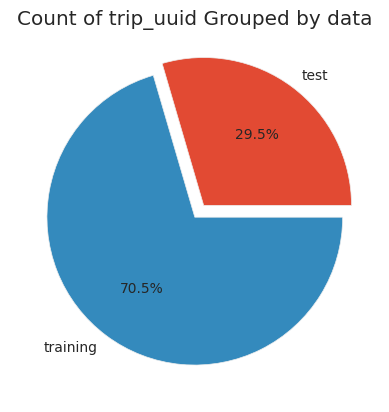

In [324]:
grouped=segment.groupby(by = 'data')['trip_uuid'].count()
explode = [0]*len(grouped)

# If you want to explode the first slice, for example, you can do:
explode[0] = 0.1

grouped.plot(kind='pie', autopct='%1.1f%%', explode=explode)

plt.ylabel('')  # This removes the 'trip_uuid' label on the y-axis
plt.title('Count of trip_uuid Grouped by data')
plt.show()

**70.5% **of the data is** training data** rest is **test data**

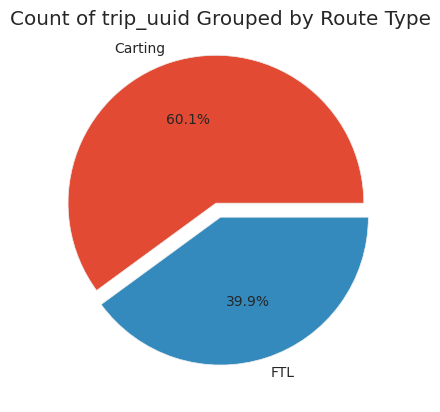

In [330]:
grouped=segment.groupby(by = 'route_type')['route_type'].count()
explode = [0]*len(grouped)

# If you want to explode the first slice, for example, you can do:
explode[0] = 0.1

grouped.plot(kind='pie', autopct='%1.1f%%', explode=explode)

plt.ylabel('')  # This removes the 'trip_uuid' label on the y-axis
plt.title('Count of trip_uuid Grouped by Route Type')
plt.show()

**60% **of the route type is **Catering**

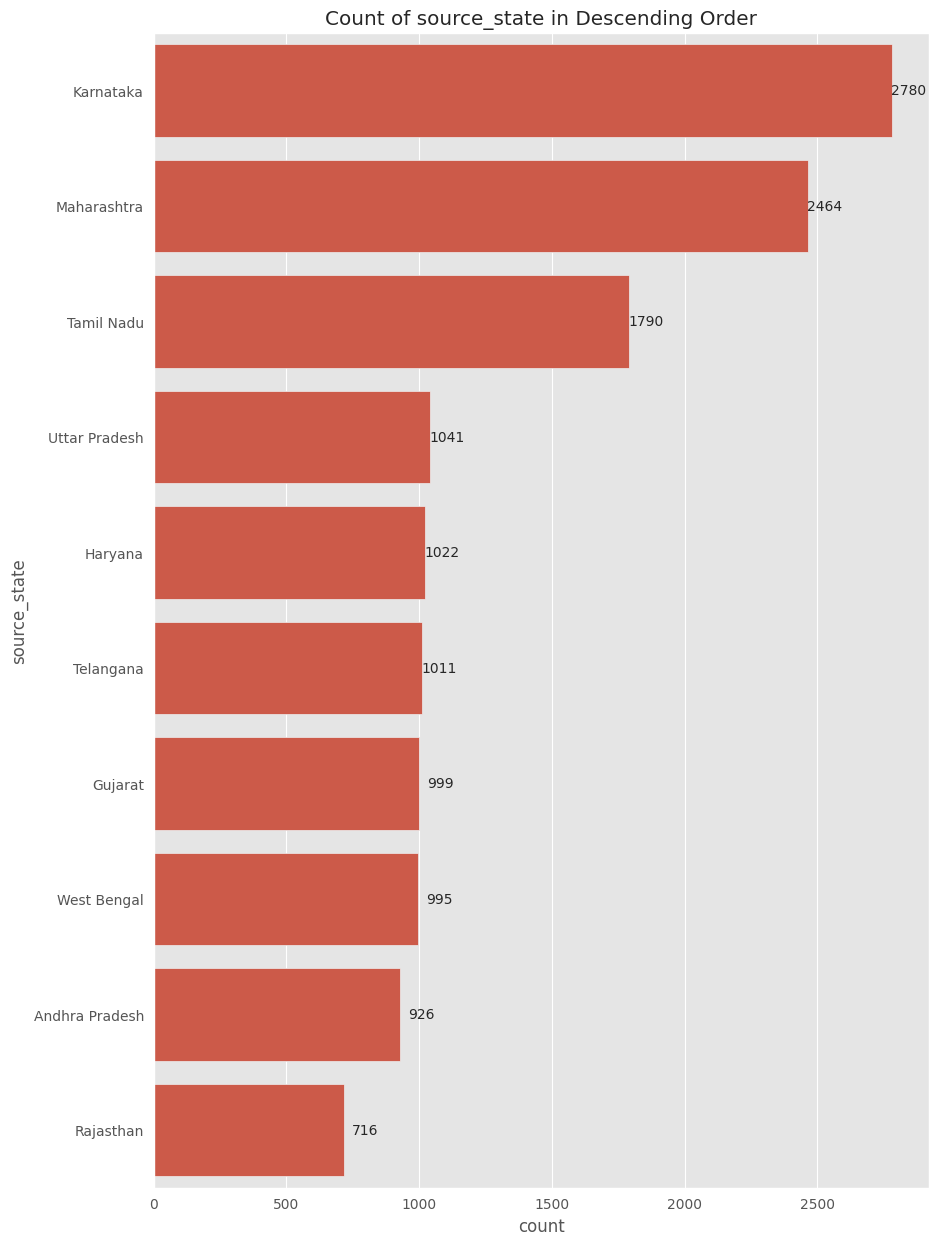

In [337]:
state_counts = segment['source_state'].value_counts().sort_values(ascending=False).nlargest(10)

# Create the count plot
plt.figure(figsize=(10, 15))
plot = sns.countplot(data=segment, y='source_state', order=state_counts.index)

for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                  xytext=(25, 0),
                  textcoords='offset points',
                  ha='right', va='center')

plt.title('Count of source_state in Descending Order')
plt.show()

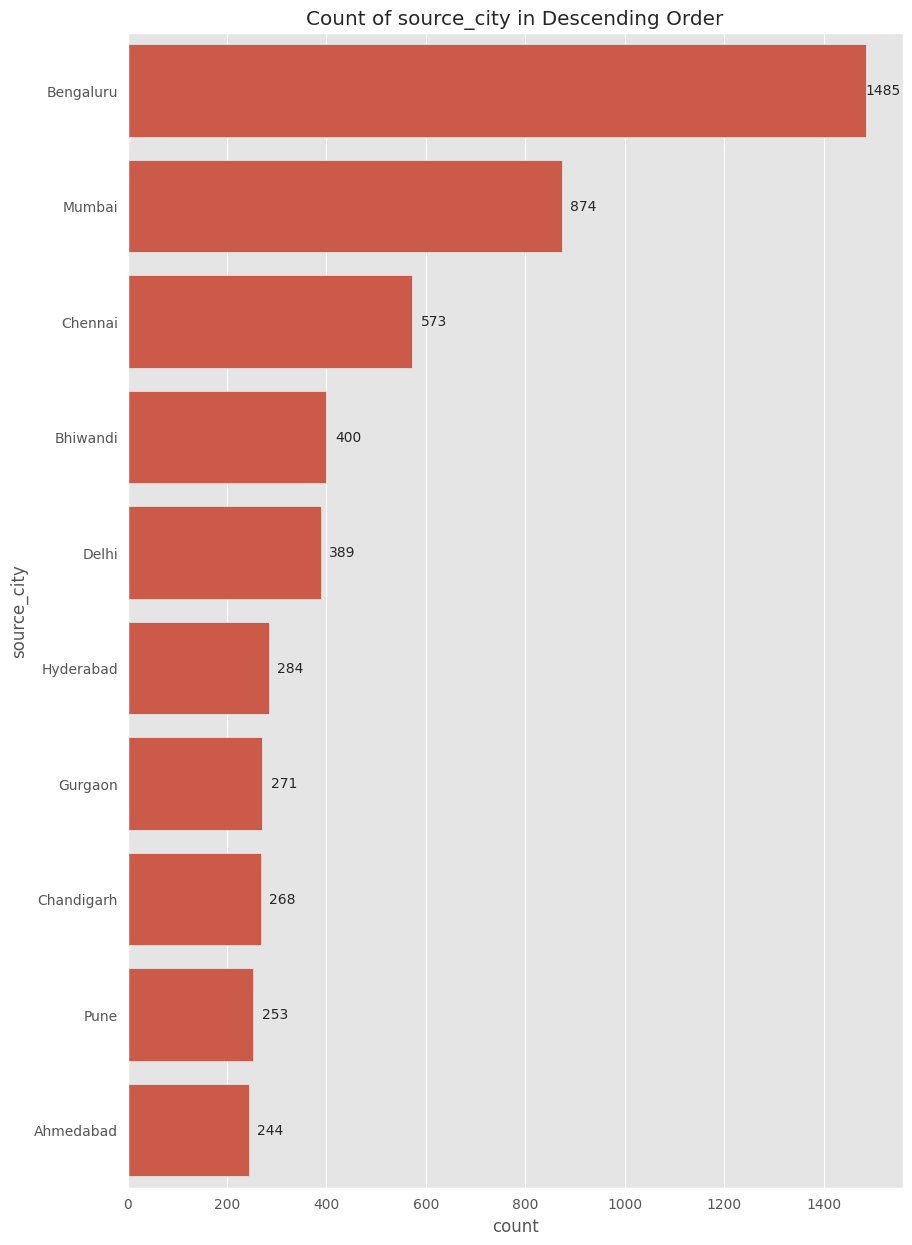

In [369]:
state_city = segment['source_city'].value_counts().sort_values(ascending=False).nlargest(10)

# Create the count plot
plt.figure(figsize=(10, 15))
plot = sns.countplot(data=segment, y='source_city', order=state_city.index)

for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                  xytext=(25, 0),
                  textcoords='offset points',
                  ha='right', va='center')

plt.title('Count of source_city in Descending Order')
plt.show()

In [365]:
state_city

source_city
Bengaluru     1485
Mumbai         874
Chennai        573
Bhiwandi       400
Delhi          389
Hyderabad      284
Gurgaon        271
Chandigarh     268
Pune           253
Ahmedabad      244
Name: count, dtype: int64

**Karnataka** has highest export(source)

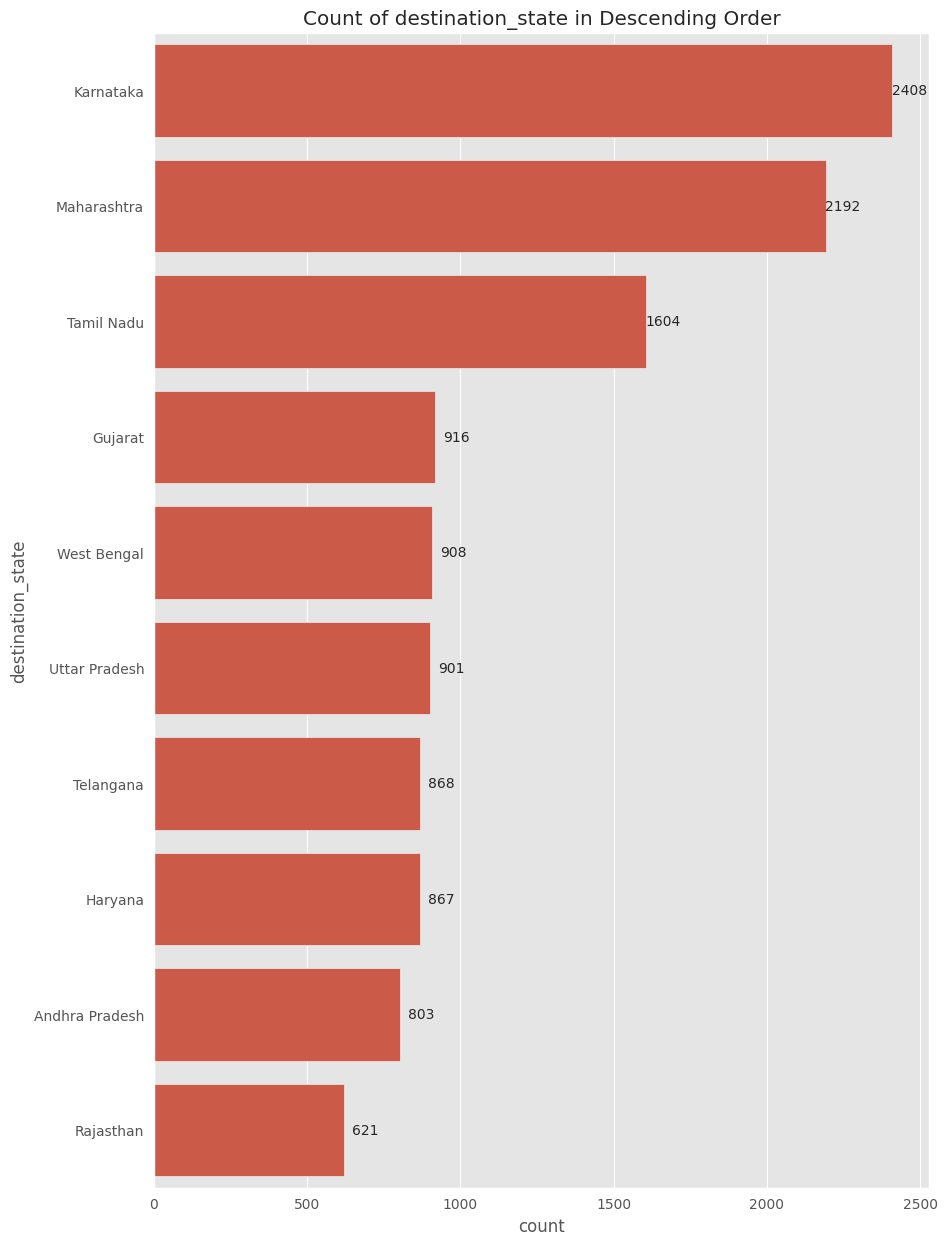

In [374]:
state_counts = segment['destination_state'].value_counts().sort_values(ascending=False).nlargest(10)

# Create the count plot
plt.figure(figsize=(10, 15))
plot = sns.countplot(data=segment, y='destination_state', order=state_counts.index)

for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                  xytext=(25, 0),
                  textcoords='offset points',
                  ha='right', va='center')

plt.title('Count of destination_state in Descending Order')
plt.show()

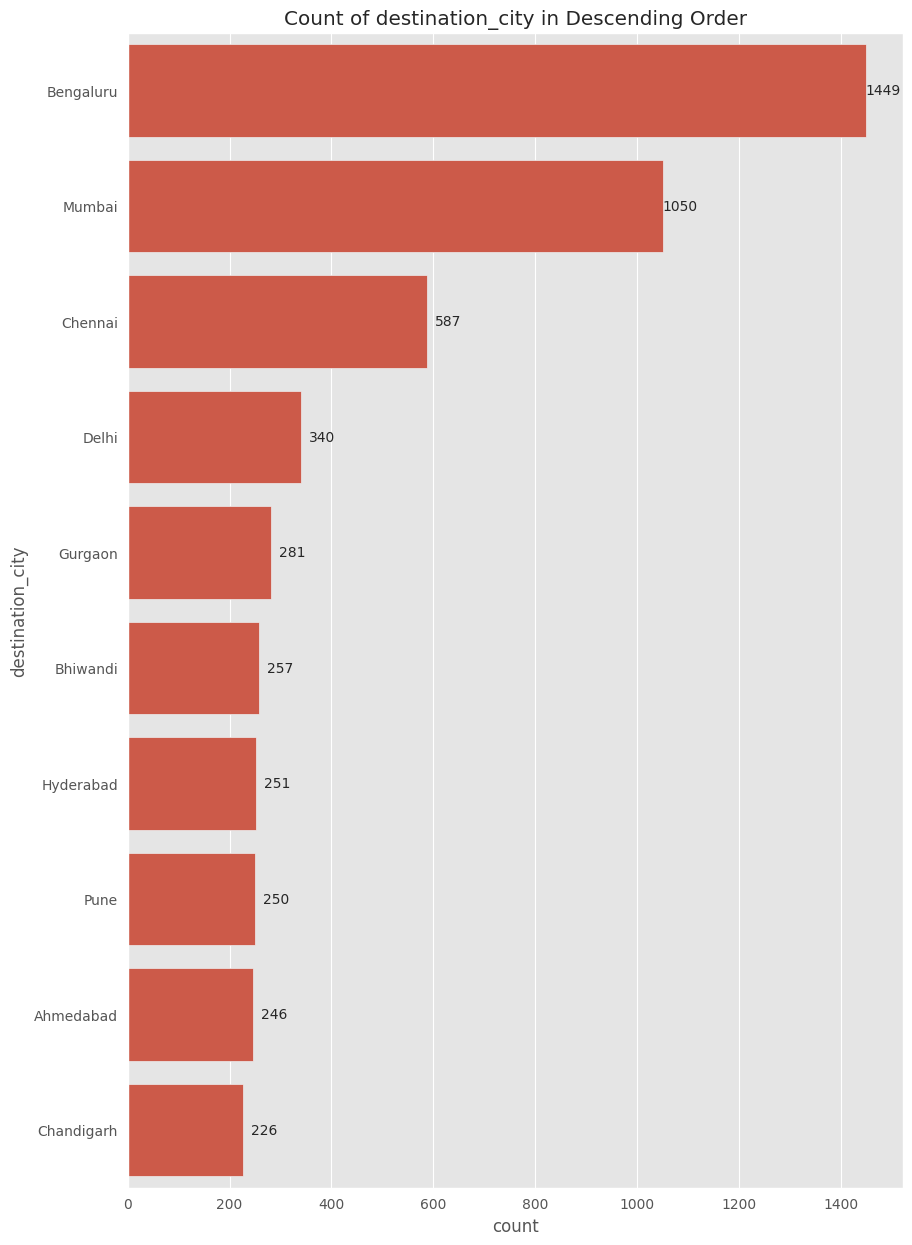

In [370]:
state_city = segment['destination_city'].value_counts().sort_values(ascending=False).nlargest(10)

# Create the count plot
plt.figure(figsize=(10, 15))
plot = sns.countplot(data=segment, y='destination_city', order=state_city.index)

for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                  xytext=(25, 0),
                  textcoords='offset points',
                  ha='right', va='center')

plt.title('Count of destination_city in Descending Order')
plt.show()

There are more conssumers in **Karnataka** than any other states

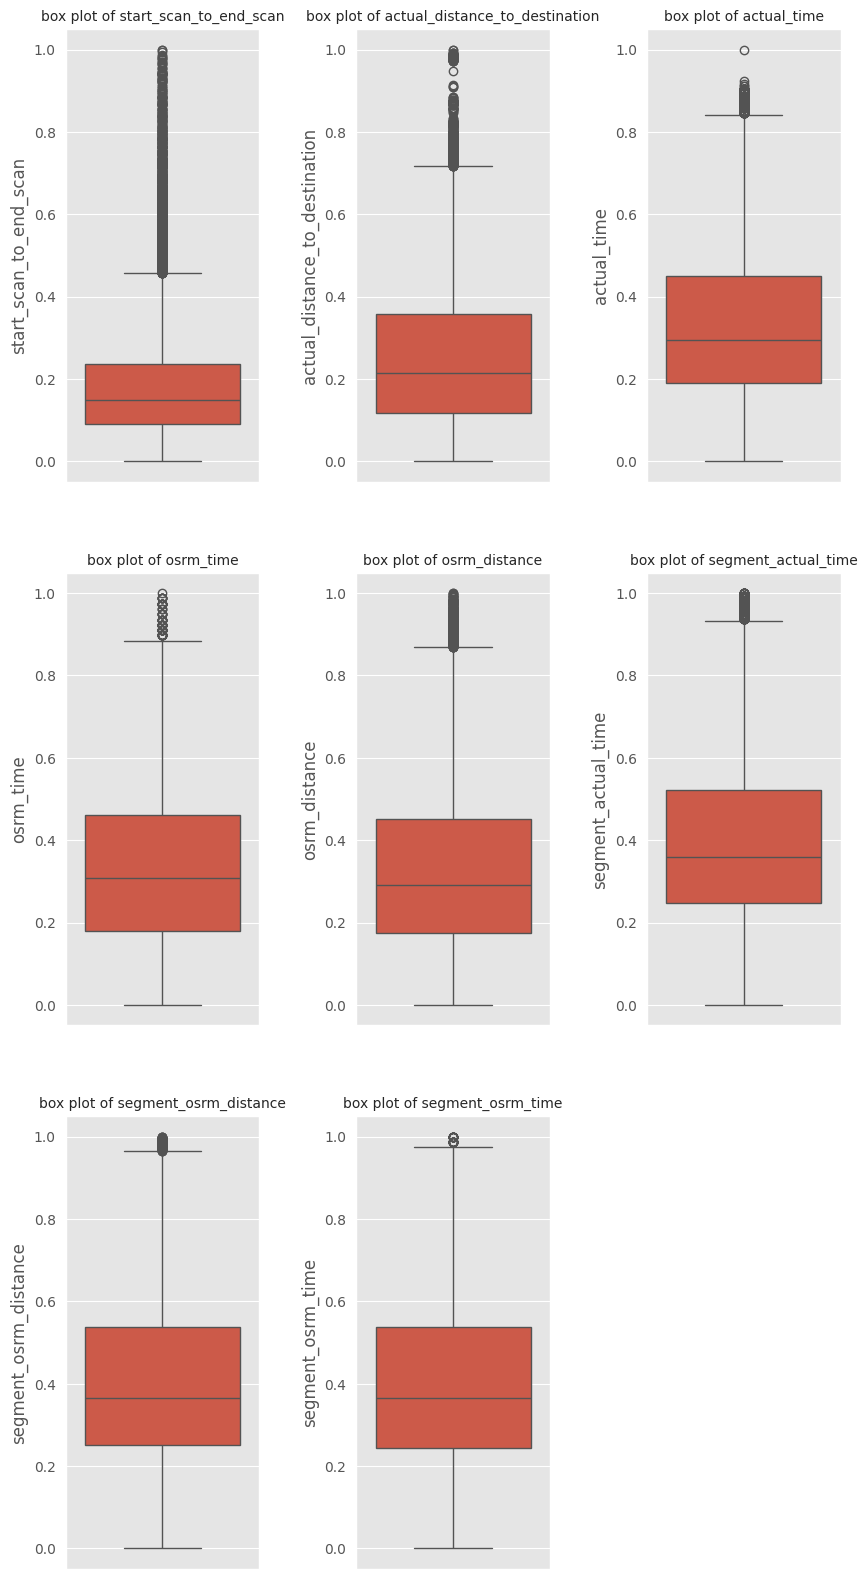

In [339]:
numerical_columns=["start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time","osrm_distance","segment_actual_time","segment_osrm_distance","segment_osrm_time"]

plt.figure(figsize=(10,20))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.2)
for i,j in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=segment,y=j)
    plt.title(f"box plot of {j}", fontdict={'fontsize': 10})
plt.show()

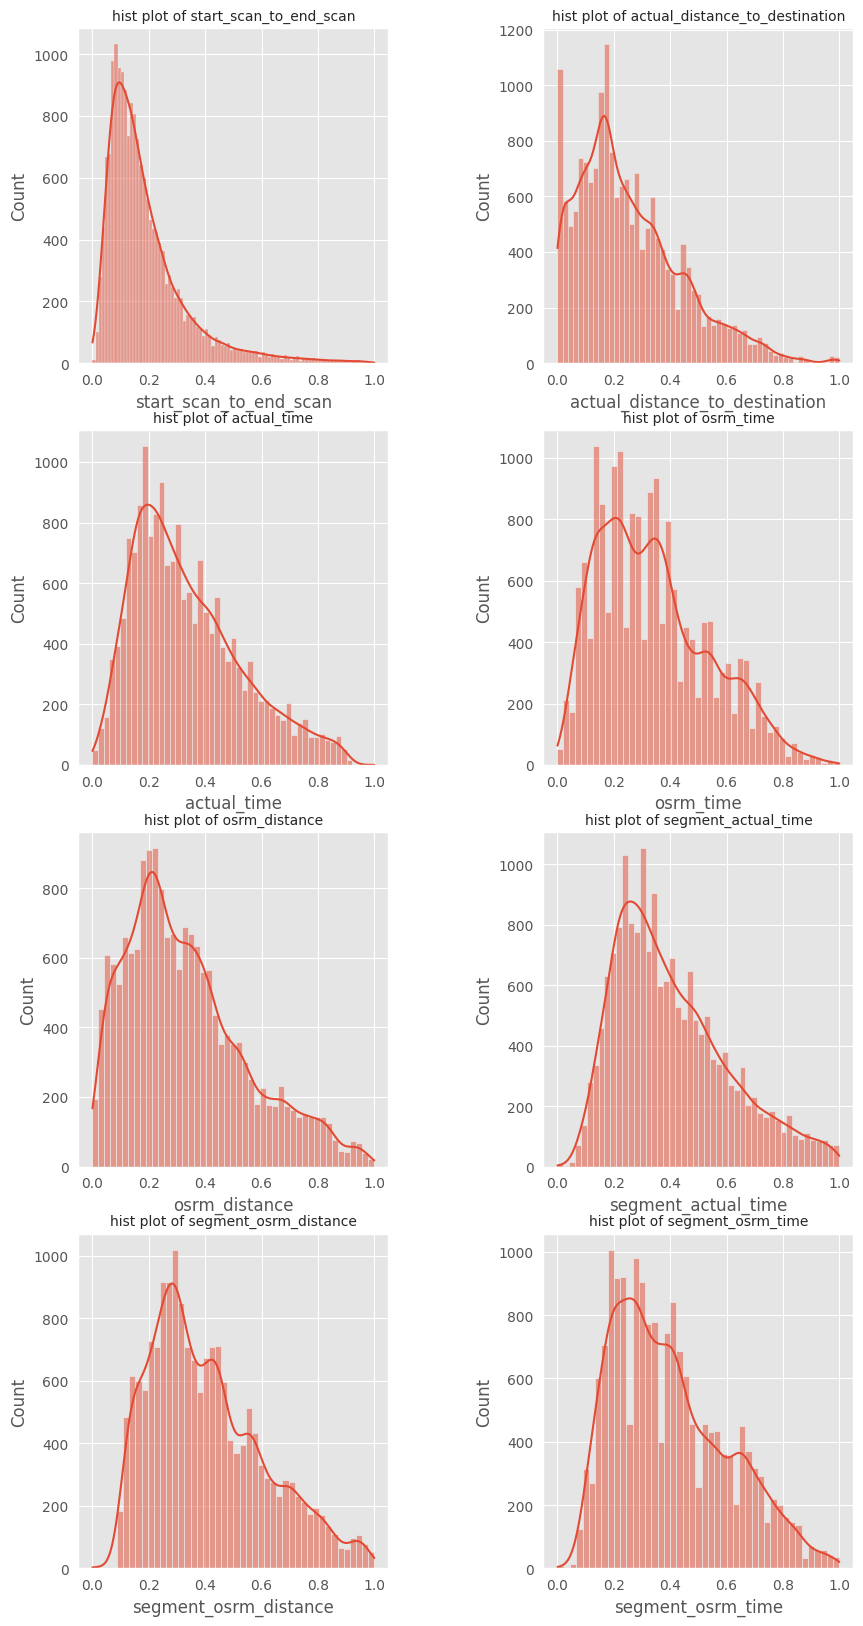

In [341]:
plt.figure(figsize=(10,20))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.2)
for i,j in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data=segment,x=j,kde='true')
    plt.title(f"hist plot of {j}", fontdict={'fontsize': 10})
plt.show()

In [342]:


for i, j in enumerate(numerical_columns):

    # Calculate IQR
    q1 = segment[j].quantile(0.25)
    q3 = segment[j].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter outliers
    outlier =segment.loc[(segment[j] < lower_bound) | (segment[j] > upper_bound)]

    print(f"------------------------------Details of {j} ----------------------------------------")
    print(f"Q1--> {q1}")
    print(f"Q3--> {q3}")
    print(f"Lower Bound--> {lower_bound}")
    print(f"Upper Bound--> {upper_bound}")
    print(f"Outlier--> {outlier.shape[0]}")
    print(f"------------------------------------------------------------------------------------")
    # Plot boxplots
    segment = segment.loc[(segment[j] >= lower_bound) & (segment[j] <= upper_bound)]



------------------------------Details of start_scan_to_end_scan ----------------------------------------
Q1--> 0.0910569105691057
Q3--> 0.23739837398373984
Lower Bound--> -0.1284552845528455
Upper Bound--> 0.45691056910569106
Outlier--> 1048
------------------------------------------------------------------------------------
------------------------------Details of actual_distance_to_destination ----------------------------------------
Q1--> 0.11394300524222235
Q3--> 0.3507017979049911
Lower Bound--> -0.24119518375193083
Upper Bound--> 0.7058399868991443
Outlier--> 352
------------------------------------------------------------------------------------
------------------------------Details of actual_time ----------------------------------------
Q1--> 0.1834319526627219
Q3--> 0.4319526627218935
Lower Bound--> -0.18934911242603553
Upper Bound--> 0.8047337278106509
Outlier--> 292
------------------------------------------------------------------------------------
-------------------------

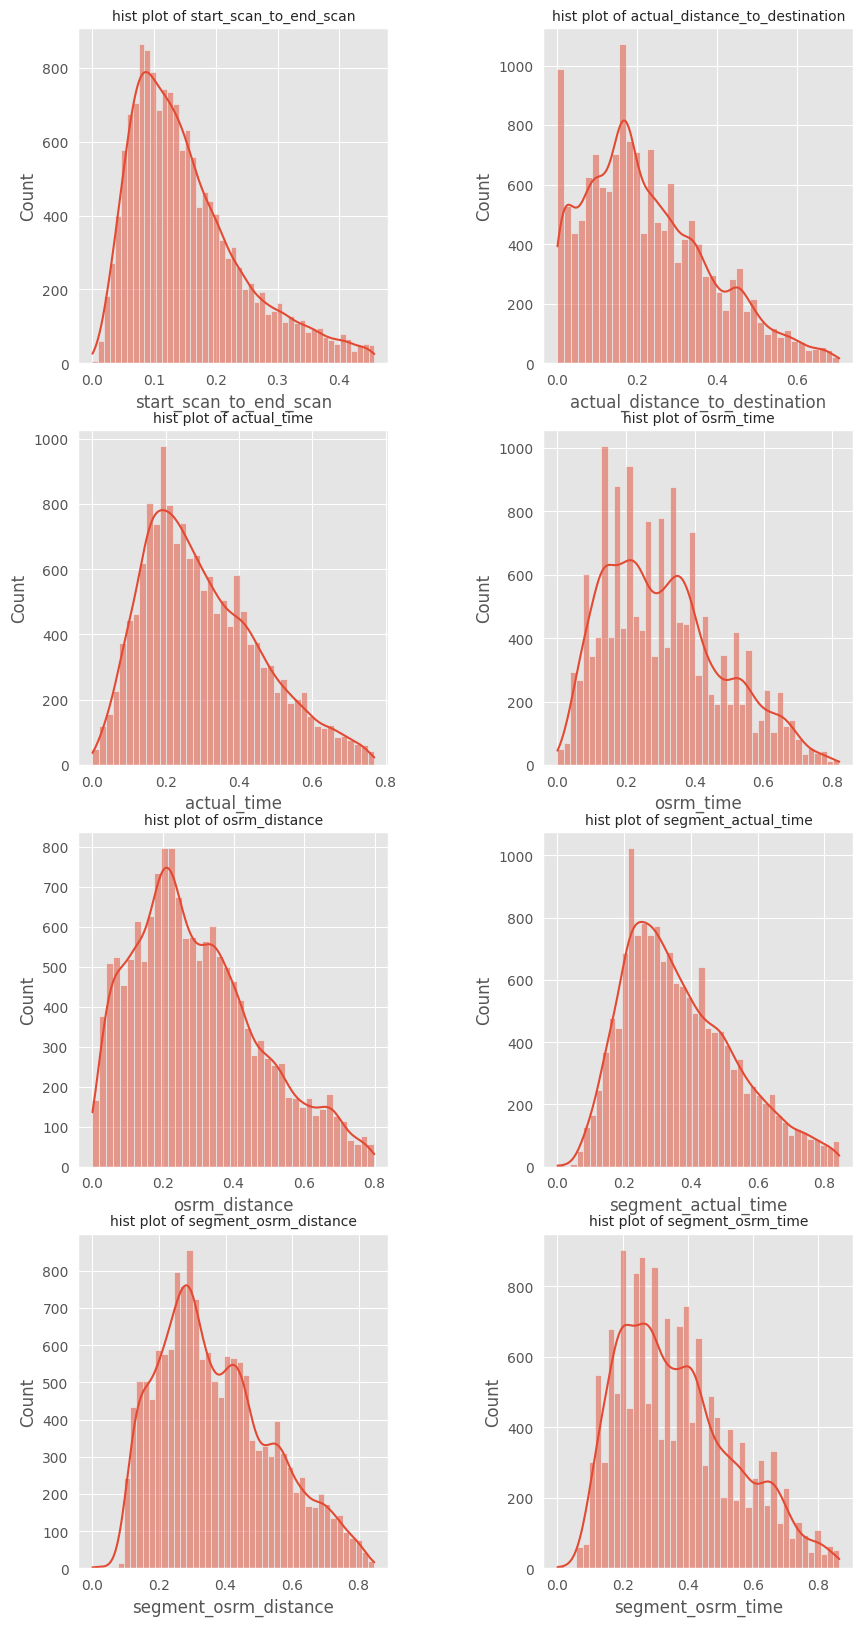

In [343]:
plt.figure(figsize=(10,20))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.2)
for i,j in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data=segment,x=j,kde='true')
    plt.title(f"hist plot of {j}", fontdict={'fontsize': 10})
plt.show()

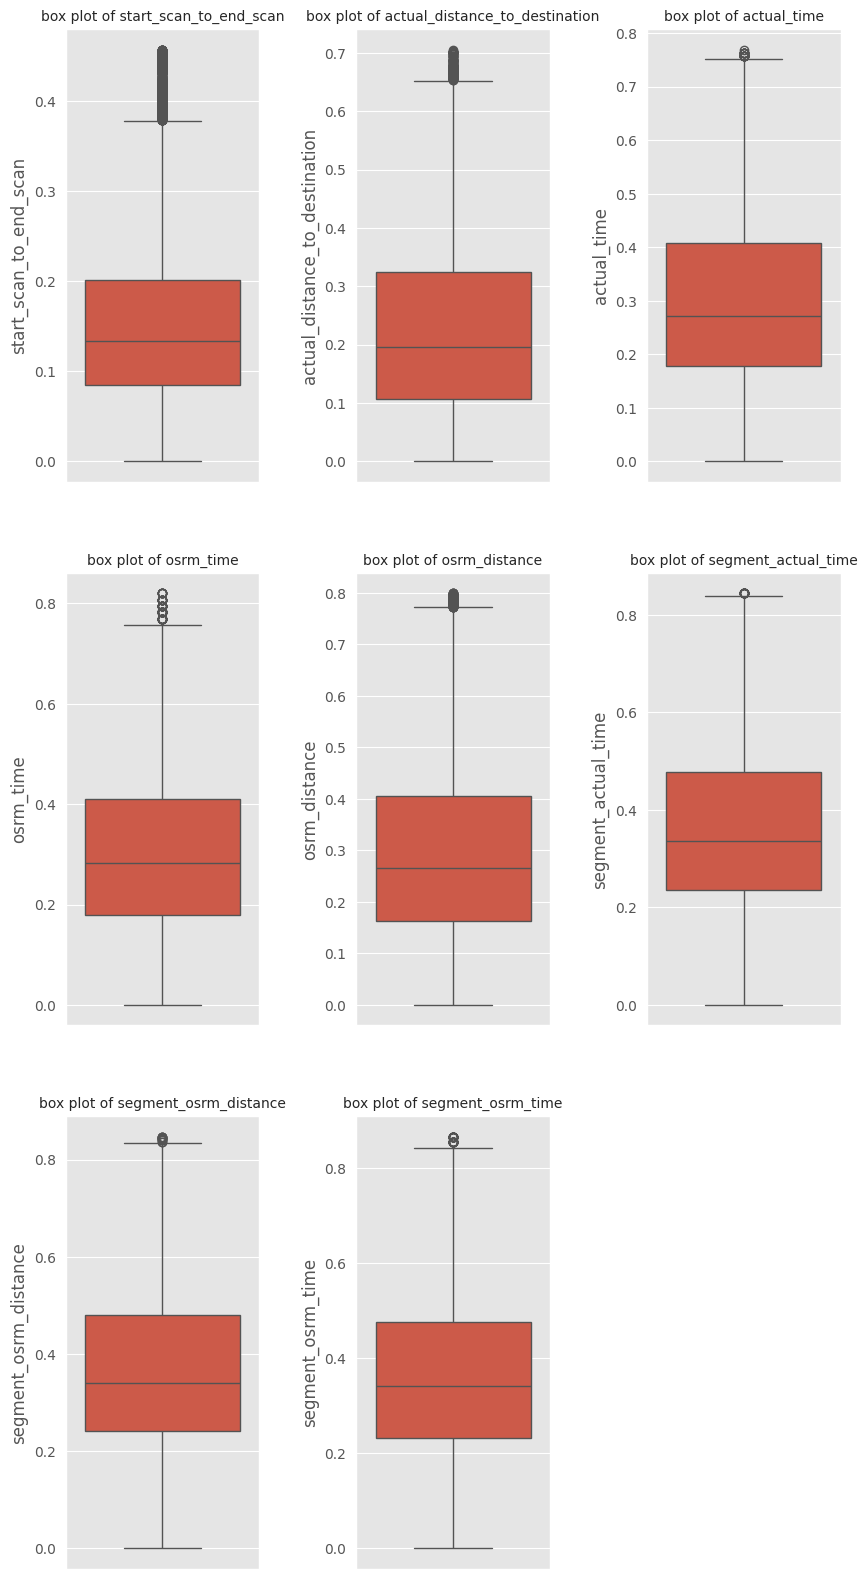

In [344]:
plt.figure(figsize=(10,20))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.2)
for i,j in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=segment,y=j)
    plt.title(f"box plot of {j}", fontdict={'fontsize': 10})
plt.show()

In [244]:
categorical_cols = ['segment_key', 'data', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'destination_state', 'source_state', 'destination_city', 'destination_place', 'destination_code', 'source_city', 'source_place', 'source_code', 'trip_creation_month_name']

# Perform one-hot encoding
df_encoded  = pd.get_dummies(segment, columns=categorical_cols)

In [283]:
scaler = MinMaxScaler()

for i in numerical_columns:
    segment[i] = scaler.fit_transform(segment[[i]])

In [345]:
segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_time,od_time_diff_hour,destination_state,source_state,destination_city,destination_place,destination_code,source_city,source_place,source_code,trip_creation_month,trip_creation_hour,trip_creation_day,trip_creation_year,trip_creation_month_name
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,0.060163,0.128643,0.130178,0.166667,0.146294,0.192547,49.0,0.222778,0.219512,0 days 00:58:49.943264,Karnataka,Karnataka,Chikblapur,Shntisgr,D,Doddablpur,Chikadpp,D,9,0,12,2018,September
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,0.164228,0.493480,0.514793,0.461538,0.574587,0.590062,301.0,0.602620,0.463415,0 days 02:02:46.769161,Karnataka,Karnataka,Doddablpur,Chikadpp,D,Tumkur,Veersagr,I,9,0,12,2018,September
6,trip-153671046011330457_IND400072AAB_IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,0.128455,0.102019,0.295858,0.115385,0.127401,0.366460,82.0,0.207726,0.182927,0 days 01:40:29.696112,Maharashtra,Maharashtra,Mumbai,Mirard,Ip,Mumbai,Mumbai Hub,Unknown Code,9,0,12,2018,September
7,trip-153671052974046625_IND583101AAA_IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,0.213008,0.441884,0.467456,0.358974,0.461498,0.546584,130.0,0.509741,0.390244,0 days 02:32:00.774868,Karnataka,Karnataka,Hospet,Hospet,Unknown Code,Bellary,Unknown,Dc,9,0,12,2018,September
9,trip-153671052974046625_IND583201AAA_IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,0.095935,0.166488,0.147929,0.192308,0.174354,0.211180,34.0,0.248323,0.243902,0 days 01:20:32.598828,Karnataka,Karnataka,Sandur,Wrdn1Dpp,D,Hospet,Hospet,Unknown Code,9,0,12,2018,September


## 5)Hypothesis Testing

**significant value=0.05**

### a)Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid

In [346]:
segment[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,15413.000000,15413.000000
mean,0.300369,0.308918
std,0.159226,0.170311
min,0.000000,0.000000
25%,0.177515,0.179487
50%,0.272189,0.282051
75%,0.408284,0.410256
max,0.769231,0.820513


[]

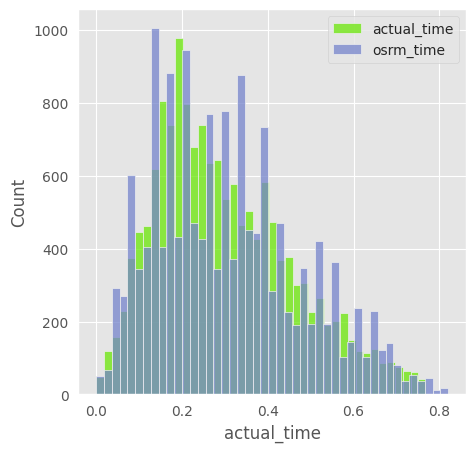

In [347]:
plt.figure(figsize = (5,5))
sns.histplot(segment['actual_time'], color = '#6ae708')
sns.histplot(segment['osrm_time'], color = '#7584cc')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

[]

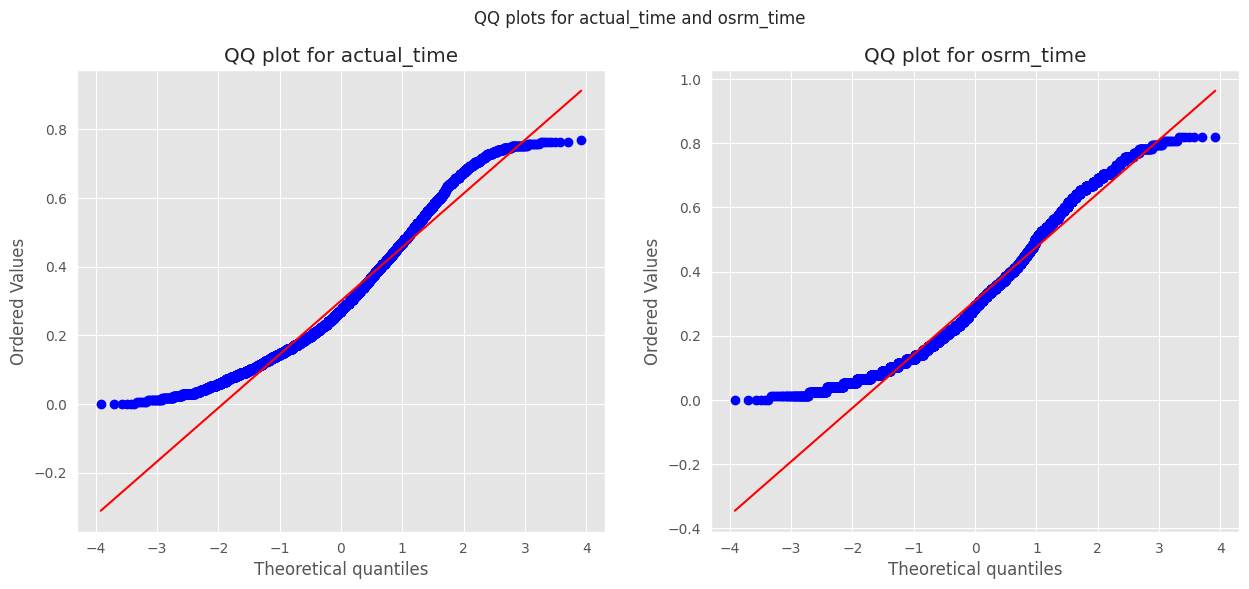

In [348]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
probplot(segment['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
probplot(segment['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

Form the Q plot we can see it doesn't have normal distribution

Statistical Method

*   Apply **Shapiro-Wilk** test for normality








In [349]:
test_stat, p_value = shapiro(segment['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9682694371528055e-35
The sample does not follow normal distribution


In [288]:
test_stat, p_value = shapiro(segment['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.452048266704945e-37
The sample does not follow normal distribution




*  Checking Homogenity using Laven's Test




In [290]:
test_stat, p_value = levene(segment['actual_time'], segment['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.58841925753764e-05
The samples do not have  Homogenous Variance


Since It doesn't follow normality ewe can use Ttest,we are using non-parametric corresponding to ttest

In [291]:
test_stat, p_value = mannwhitneyu(segment['actual_time'], segment['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.171607289581723
The samples are similar 


**We conclude that the actual_time and orsm time are  same**

###b) Do hypothesis testing / visual analysis between actual_time aggregated value and segment actual time aggregated value.

In [350]:
segment[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,15413.000000,15413.000000
mean,0.300369,0.366545
std,0.159226,0.165893
min,0.000000,0.000000
25%,0.177515,0.236025
50%,0.272189,0.335404
75%,0.408284,0.478261
max,0.769231,0.844720


[]

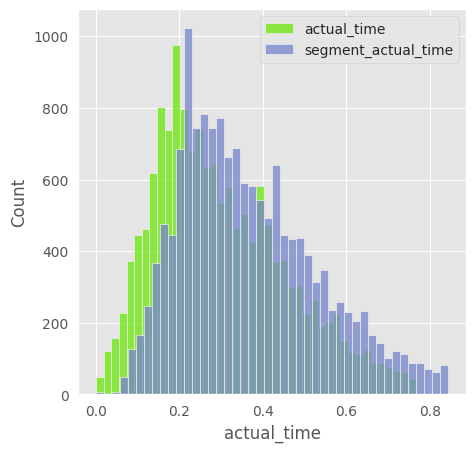

In [351]:
plt.figure(figsize = (5,5))
sns.histplot(segment['actual_time'], color = '#6ae708')
sns.histplot(segment['segment_actual_time'], color = '#7584cc')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

[]

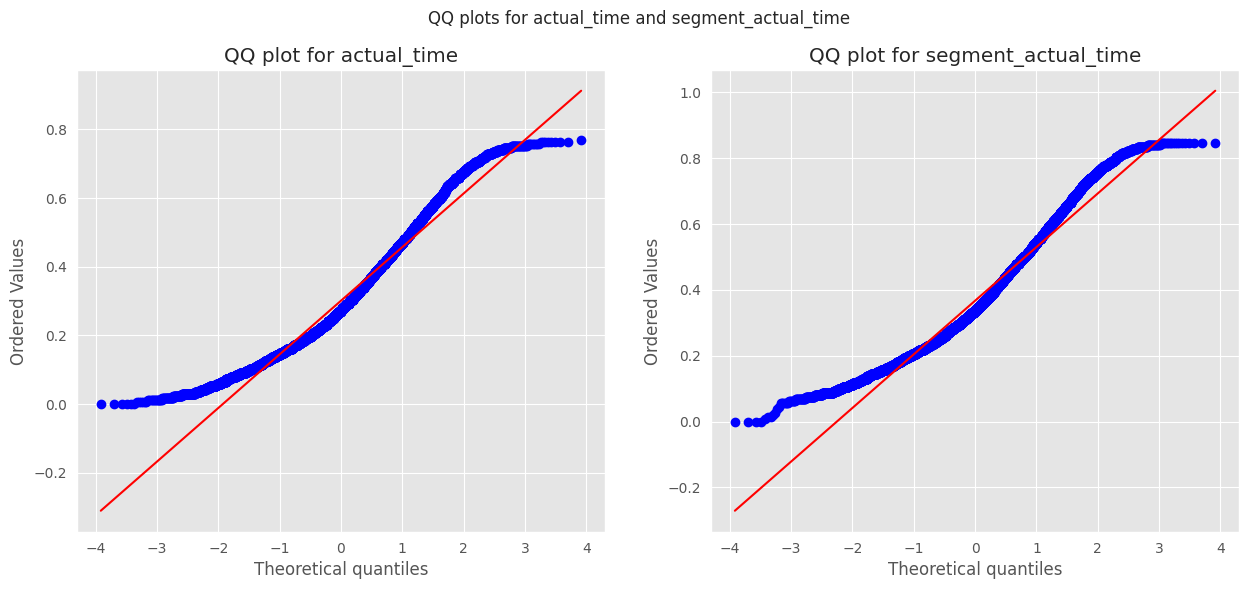

In [352]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
probplot(segment['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
probplot(segment['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

Doesn't follow normality

Statistical Method


*   Apply Shapiro-Wilk test for normality




In [353]:
test_stat, p_value = shapiro(segment['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.517715955433974e-35
The sample does not follow normal distribution


In [296]:
test_stat, p_value = shapiro(segment['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.325730747878041e-40
The sample does not follow normal distribution



*   Checking Homogenity using Laven's Test




In [297]:
test_stat, p_value = levene(segment['actual_time'], segment['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 5.40016677379723e-06
The samples do not have  Homogenous Variance


In [298]:
test_stat, p_value = mannwhitneyu(segment['actual_time'], segment['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 5.963042314239185e-245
The samples are not similar


**We conclude that Actual_time and Segment_actual_time are not same**

### c)Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [354]:
segment[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,15413.000000,15413.000000
mean,0.295922,0.370907
std,0.178509,0.169815
min,0.000000,0.000000
25%,0.162434,0.242572
50%,0.266502,0.341296
75%,0.406350,0.479581
max,0.799390,0.847283


[]

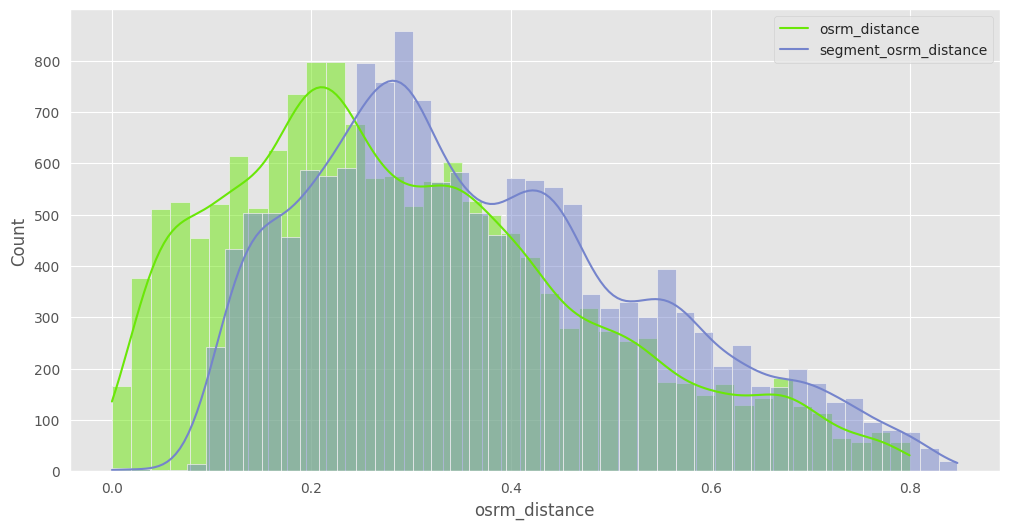

In [355]:
plt.figure(figsize = (12, 6))
sns.histplot(segment['osrm_distance'] ,color = '#6ae708',kde=True)
sns.histplot(segment['segment_osrm_distance'], color = '#7584cc',kde=True)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

[]

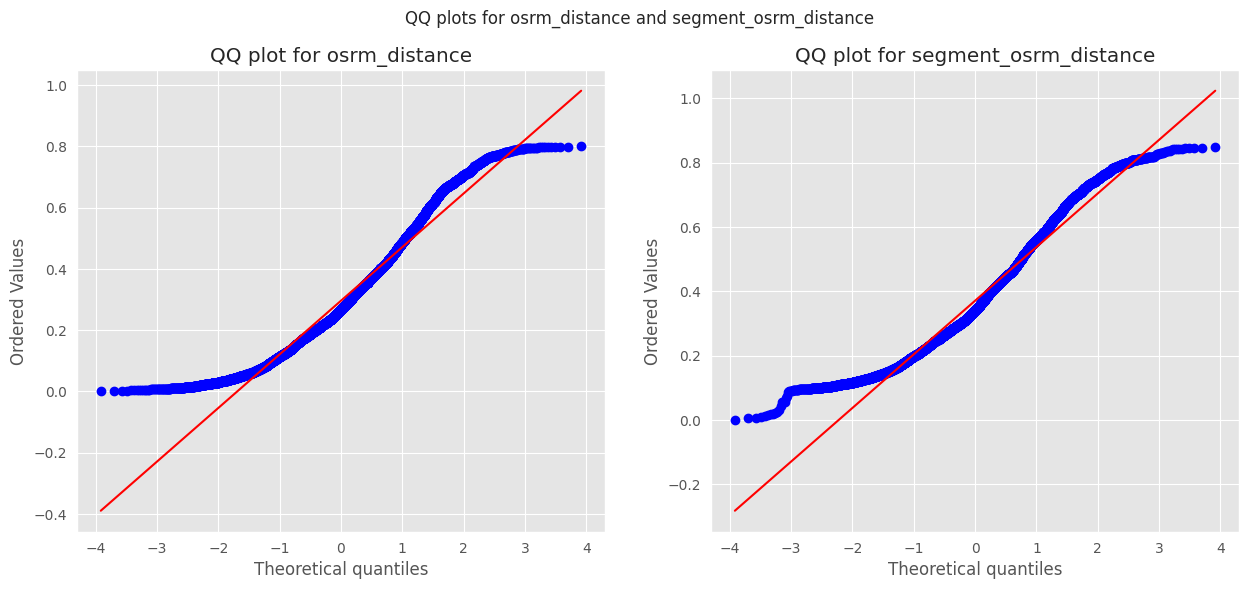

In [356]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
probplot(segment['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
probplot(segment['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()



*   Applying **Shapiro-Wilk** test for normality




In [302]:
test_stat, p_value = shapiro(segment['osrm_distance'].sample(100))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.00014198778080753982
The sample does not follow normal distribution


In [303]:
test_stat, p_value = shapiro(segment['segment_osrm_distance'].sample(100))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0002483494463376701
The sample does not follow normal distribution


The sample is not following normality



*   Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.






*   Homogeneity of Variances using **Lavene's test**




In [306]:
test_stat, p_value = levene(segment['osrm_distance'], segment['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.1071470128424739e-05
The samples do not have Homogenous Variance


Doesn't have same variance

In [307]:
test_stat, p_value = mannwhitneyu(segment['osrm_distance'], segment['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 5.0955330711017644e-288
The samples are not similar


**We conclude that osrm_distnace and segment_osrm_distance are not same**

> Add blockquote



### d) Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [357]:
segment[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,15413.000000,15413.000000
mean,0.308918,0.367417
std,0.170311,0.176071
min,0.000000,0.000000
25%,0.179487,0.231707
50%,0.282051,0.341463
75%,0.410256,0.475610
max,0.820513,0.865854


[]

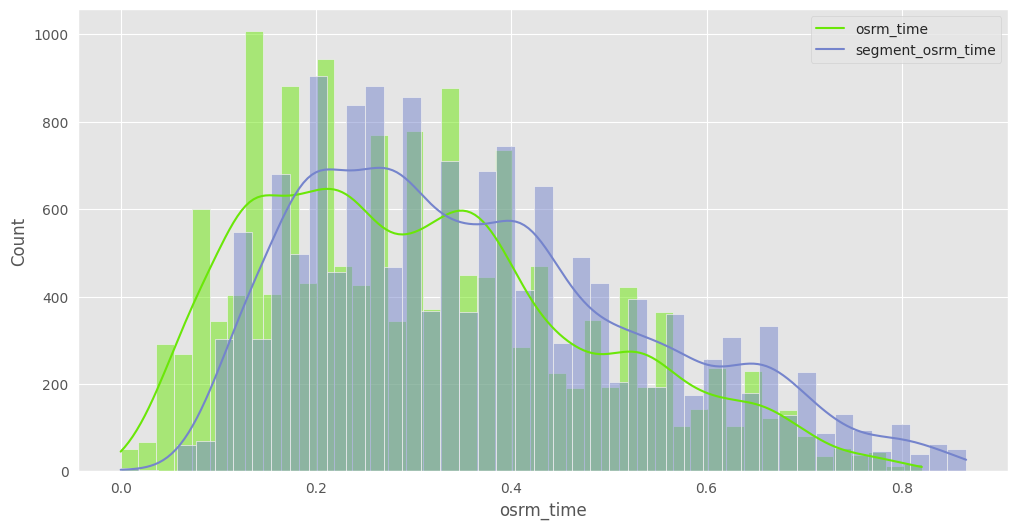

In [358]:
plt.figure(figsize = (12, 6))
sns.histplot(segment['osrm_time'], color = '#6ae708',kde=True)
sns.histplot(segment['segment_osrm_time'], color = '#7584cc',kde=True)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

[]

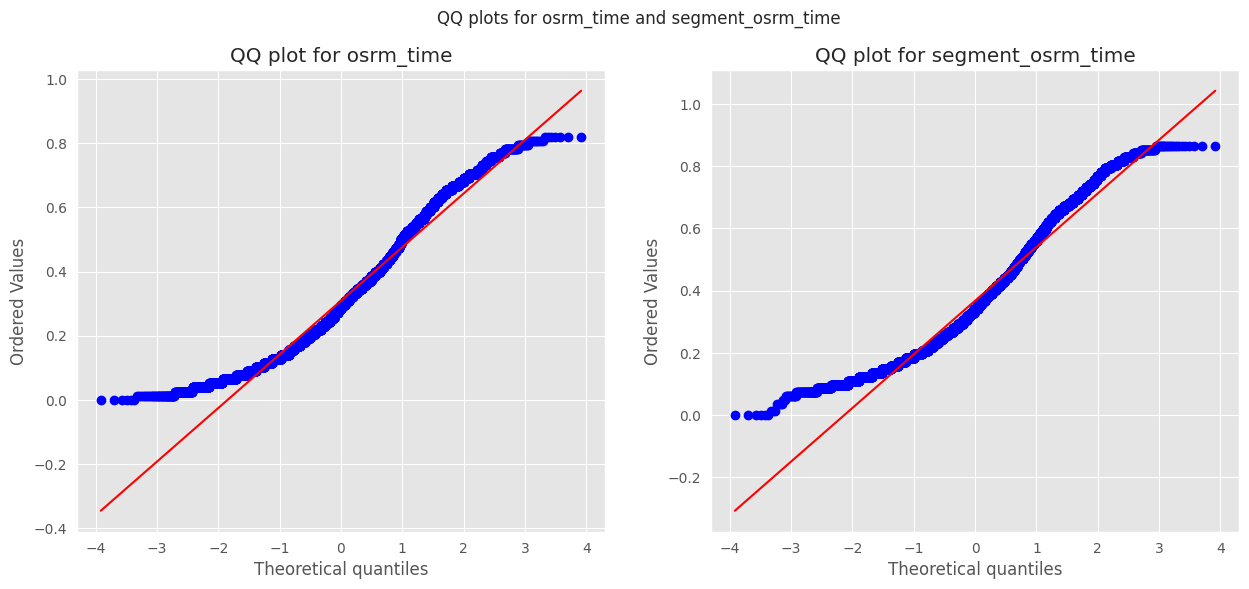

In [359]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
probplot(segment['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
probplot(segment['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()



*   Applying **Shapiro-Wilk** test for normality




In [360]:
test_stat, p_value = shapiro(segment['osrm_time'].sample(100))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0037653108593076468
The sample does not follow normal distribution


In [316]:
test_stat, p_value = shapiro(segment['segment_osrm_time'].sample(100))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.745823288336396e-05
The sample does not follow normal distribution


Both osrm_distance and segment_osrm_time doesn't follow normality




*   Homogeneity of Variances using **Lavene's test**






In [361]:
est_stat, p_value = levene(segment['osrm_time'], segment['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00038745611092654263
The samples do not have Homogenous Variance


Doesn't have same variance

In [320]:
test_stat, p_value = mannwhitneyu(segment['osrm_time'], segment['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.043027394888179e-174
The samples are not similar


**osrm_time and segment_osrm_time are not same**

## 6)Insights




*   Most common route type is** Carting**.

*   The number of trips start increasing after the noon, becomes maximum at **10 P.M** and then start .decreasing
*   Most orders are sourced from the states like  **Karnataka,Maharastra, Haryana, Tamil Nadu, Telangana**.
*   Most orders are sourced from the cities like **Bengaluru,Chennai,Mumbai**.


*   Most trip ended in **Karnatake followed by Mahrastra,Tamil Nadu** etc.
*   We conclude that the **actual_time** and **orsm time** are  statistically same.


*   We conclude that **osrm_time** and **segment_osrm_time** are not  statistically same.
*   We conclude that **Actual_time** and **Segment_actual_time** are not statistically  same.

*   We conclude that **osrm_distnac**e and **segment_osrm_distance** are statistically different .








*   Most orders are during **September**






## 7)Recommendation



*  Enhancements to the OSRM trip planning system are essential to address discrepancies and ensure optimal routing configurations for transporters.


*   The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it

*   Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

*   Regional variations in traffic and terrain conditions play a crucial role in demand planning, especially during peak festival seasons. Understanding these factors ensures effective resource allocation and customer satisfaction.





